## Shared Micromobility Vehicle Trips Data Analysis
---

### Data Source and API
- AODP Dataset Access: https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r
- API Endpoint: https://data.austintexas.gov/resource/7d8e-dm7r.json
- API Documentation: https://dev.socrata.com/foundry/data.austintexas.gov/7d8e-dm7r

To access the dataset host, install SODA API first:
    `pip install sodapy`

### Data Extraction

- Data Provided
    - trip_id
    - device_id
    - modified_date
    - council_district_start
    - council_district_end
    - vehicle_type
    - trip_duration
    - trip_distance
    - start_time
    - end_time
    - month
    - hour
    - day_of_week
    - year
    - census_geoid_start
    - census_geoid_end

In [2]:
# Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
#import seaborn as sns
import pandas as pd
import geopandas as gpd
from sodapy import Socrata
import plotly.figure_factory as ff

In [ ]:
# url = https://data.austintexas.gov/resource/7d8e-dm7r.json
# Data Extraction:
client = Socrata("data.austintexas.gov", None)

results = client.get("7d8e-dm7r", limit=83000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
results_df.head()

In [ ]:
# Check for missing values:
results_df.count()

In [ ]:
# Checking and confirming the missing values:
missing_census_geoid_start = results_df["census_geoid_start"].isnull().sum()
print(f"There are {missing_census_geoid_start} missing census_geoid_start.")

In [ ]:
results_df.isnull().sum()

### Data Cleaning

In [ ]:
clean_df = results_df.copy()

In [ ]:
clean_df.columns = clean_df.columns.str.replace('_',' ').str.title()
clean_df

In [ ]:
# Renaming some column names:
clean_df = clean_df.rename(columns = {
    "Trip Id": "Trip ID",
    "Device Id": "Device ID",
    "Census Geoid Start": "Census GEOID Start",
    "Census Geoid End": "Census GEOID End",
})
clean_df.head()

In [ ]:
# Drop all the null values
clean_df = clean_df.dropna(how='any')
clean_df.head()

In [ ]:
# Change the time and date format for columns - 'Modified Date', 'Start time' and 'End Time'
clean_df['Start Time'] = pd.to_datetime(clean_df['Start Time'])
clean_df['End Time'] = pd.to_datetime(clean_df['End Time'])
clean_df['Modified Date'] = pd.to_datetime(clean_df['Modified Date'])
clean_df.head()

In [ ]:
#Find the total number of scooter rides:
scooters = clean_df[clean_df["Vehicle Type"] == "scooter"]
total_scooters = len(clean_df) - scooters.shape[0]
total_scooters

In [ ]:
#Find the total number of bicycle rides:
bicycles = clean_df[clean_df["Vehicle Type"] == "bicycle"]
total_bicycles = len(clean_df) - bicycles.shape[0]
total_bicycles

In [ ]:
#Check to tally the total rides 
total_rides = total_bicycles + total_scooters
total_rides

In [ ]:
# Find the number of unique devices
device_id_list =  clean_df["Device ID"].value_counts()
device_id_list

In [ ]:
# Find the number of unique GEOIDs where the trips started
start_geoid = clean_df["Census GEOID Start"].value_counts()
start_geoid

In [ ]:
# Find the number of unique GEOIDs where the trips ended
end_geoid = clean_df["Census GEOID End"].value_counts()
end_geoid

In [ ]:
# Convert dataframe to CSV 
output_data_file = "/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/shared_mobility_data.csv"
clean_df.to_csv(output_data_file)

In [4]:
# Load the cleaned Shared Mobility CSV File
csvpath1 = os.path.join("/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/shared_mobility_data.csv")
clean_df = pd.read_csv(csvpath1, low_memory=False)
clean_df.head(10)

,Unnamed: 0,Trip ID,Device ID,Modified Date,Council District Start,Council District End,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day Of Week,Year,Census GEOID Start,Census GEOID End
0,2,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9,9,scooter,170,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601
1,3,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9,9,scooter,90,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601
2,4,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,2019-04-30 06:45:17,9,9,scooter,570,826,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453001100,48453001100
3,5,cd442fb9-058f-46a7-af90-b4adb56fd163,1653cf10-75f5-4934-a9d9-c8d43ade67a9,2019-04-30 06:45:17,9,9,scooter,438,1815,2019-04-29 17:30:00,2019-04-29 17:45:00,4,17,1,2019,48453000601,48453000500
4,6,e1ac0e42-ab2d-4eac-b019-f085169c1d38,1d89f9e2-d01a-4736-b7d8-258cb9a2108c,2019-04-30 06:45:17,9,9,scooter,391,1519,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000401,48453000307
5,7,b7df9ed5-61ae-40ca-9b7e-0ffa1d092b79,09b2c7b8-6631-4999-85d5-4273b4c98f3a,2019-04-30 06:45:17,9,9,scooter,153,0,2019-04-29 17:00:00,2019-04-29 17:00:00,4,17,1,2019,48453000604,48453000604
6,8,1c8b3eab-6aed-4b69-8eca-6b5e0b70a45f,ab262134-2421-49b7-a97f-fadde23e71db,2019-04-30 06:45:17,9,9,scooter,570,1843,2019-04-29 17:30:00,2019-04-29 17:45:00,4,17,1,2019,48453001100,48453001100
7,9,f9174176-9d16-431d-af21-ebcab226da31,73e8b0bf-3aae-4f80-8683-c5d7c3b3989a,2019-04-30 06:45:17,9,9,scooter,668,2829,2019-04-29 17:15:00,2019-04-29 17:30:00,4,17,1,2019,48453000603,48453001200
8,10,1c2a190d-06d7-42fa-8d3d-336b01cf1e09,c4ce4cc9-daf2-4273-aae5-136b0afa1f55,2019-04-30 06:45:17,9,3,scooter,390,1283,2019-04-29 17:30:00,2019-04-29 17:45:00,4,17,1,2019,48453001100,48453002304
9,11,7211c488-c0ad-40a9-8a07-4326dbb56c6f,9e6ae0d2-76a0-4e24-8f6e-8d724564b638,2019-04-30 06:45:17,9,9,scooter,432,1698,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000603


In [5]:
clean_df = clean_df.drop(columns=['Unnamed: 0'])
clean_df

,Trip ID,Device ID,Modified Date,Council District Start,Council District End,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day Of Week,Year,Census GEOID Start,Census GEOID End
0,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9,9,scooter,170,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601
1,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9,9,scooter,90,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601
2,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,2019-04-30 06:45:17,9,9,scooter,570,826,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453001100,48453001100
3,cd442fb9-058f-46a7-af90-b4adb56fd163,1653cf10-75f5-4934-a9d9-c8d43ade67a9,2019-04-30 06:45:17,9,9,scooter,438,1815,2019-04-29 17:30:00,2019-04-29 17:45:00,4,17,1,2019,48453000601,48453000500
4,e1ac0e42-ab2d-4eac-b019-f085169c1d38,1d89f9e2-d01a-4736-b7d8-258cb9a2108c,2019-04-30 06:45:17,9,9,scooter,391,1519,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000401,48453000307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8404390,4881260f-eb58-4ccc-83b0-27d7e6dbd9b7,5bf04f17-a5bc-4c70-bb73-19ffde81e67c,2020-01-09 17:30:09,9,9,scooter,195,20,2020-01-09 03:45:00,2020-01-09 03:45:00,1,3,4,2020,48453000603,48453000603
8404391,f211b58a-094a-4799-834a-0ad7ea384417,04ea74b3-971b-41b5-9d02-202ae4e7d416,2020-01-09 17:30:09,9,9,scooter,755,94,2020-01-09 03:15:00,2020-01-09 03:30:00,1,3,4,2020,48453001100,48453001100
8404392,52e332f3-b1fa-417f-bfaa-cf660e30cea9,28df919d-5d6d-42e2-af7f-8d9b3ee771a9,2020-01-09 17:30:09,9,9,scooter,135,25,2020-01-09 04:00:00,2020-01-09 04:00:00,1,4,4,2020,48453000603,48453000604
8404393,e5d899b1-2bc3-470c-a602-5445347e5e67,b73b5afd-64d0-438a-a962-90e1bf8b044f,2020-01-09 17:30:21,9,9,scooter,299,924,2020-01-09 07:15:00,2020-01-09 07:15:00,1,7,4,2020,48453001200,48453001100


In [11]:
# Print 0m or negative trip distance values.
rows = clean_df.shape[0]
clean_df2 = clean_df[clean_df["Trip Distance"] > 0]
neg_0m_rows = rows - clean_df2.shape[0]
rows_remaining = clean_df2.shape[0]
print("Negative or 0m distance trips: " + str(neg_0m_rows))

Negative or 0m distance trips: 564108


In [8]:
# Unique Census Tracts
print("Number of Census Tract Starts: " + str(len(set(clean_df["Census GEOID Start"]))))
print("Number of Census Tract Ends: " + str(len(set(clean_df["Census GEOID End"]))))

unique_census = pd.DataFrame(set(clean_df["Census GEOID End"].append(clean_df["Census GEOID Start"])))
print("Number of unique Census Tracts in the data: " + str(len(unique_census)))

Number of Census Tract Starts: 283
Number of Census Tract Ends: 272
Number of unique Census Tracts in the data: 292


### Data Merging

In [44]:
# Load the Census Tract-Zip conversion CSV File
csvpath2 = os.path.join("/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/tract_to_zip.csv")
zip_data_start = pd.read_csv(csvpath2)
zip_data_end = pd.read_csv(csvpath2)

In [54]:
#zip_data_start.rename(columns={'zip': 'Zipcode', 'tract': 'Census GEOID Start'}, inplace=True)
zip_data_start = zip_data_start.dropna()
zip_data_end = zip_data_end.dropna()
zip_data_start

,tract,zip,population
0,48453000101,78731,4652
1,48453000102,78731,2604
2,48453000203,78751,1890
3,48453000204,78756,3013
4,48453000205,78756,3942
...,...,...,...
260,48053960800,78669,5735
261,48031950100,78669,2281
262,48021950802,78617,5434
263,48021950801,78617,8019


In [49]:
zip_data_start = zip_data_start.astype(int).astype(str)
zip_data_start

,tract,zip,population
0,48453000101,78731,4652
1,48453000102,78731,2604
2,48453000203,78751,1890
3,48453000204,78756,3013
4,48453000205,78756,3942
...,...,...,...
260,48053960800,78669,5735
261,48031950100,78669,2281
262,48021950802,78617,5434
263,48021950801,78617,8019


In [50]:
df_start = pd.merge(clean_df, zip_data_start, left_on="Census GEOID Start", right_on="tract")
df_start.head()

,Trip ID,Device ID,Modified Date,Council District Start,Council District End,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day Of Week,Year,Census GEOID Start,Census GEOID End,tract,zip,population
0,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9,9,scooter,170,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601,48453000601,78705,10169
1,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9,9,scooter,90,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601,48453000601,78705,10169
2,cd442fb9-058f-46a7-af90-b4adb56fd163,1653cf10-75f5-4934-a9d9-c8d43ade67a9,2019-04-30 06:45:17,9,9,scooter,438,1815,2019-04-29 17:30:00,2019-04-29 17:45:00,4,17,1,2019,48453000601,48453000500,48453000601,78705,10169
3,7211c488-c0ad-40a9-8a07-4326dbb56c6f,9e6ae0d2-76a0-4e24-8f6e-8d724564b638,2019-04-30 06:45:17,9,9,scooter,432,1698,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000603,48453000601,78705,10169
4,951b0643-824a-46e3-93c6-8d3e8dbe80eb,3c4c801f-d477-43e3-bb9f-e29db0831660,2019-04-30 06:45:17,9,9,scooter,412,736,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000603,48453000601,78705,10169


In [51]:
df_start = df_start.rename(columns={'zip': 'Zipcode Start'})

In [52]:
df_start = df_start.dropna()

In [55]:
zip_data_end = zip_data_end.astype(int).astype(str)
zip_data_end

,tract,zip,population
0,48453000101,78731,4652
1,48453000102,78731,2604
2,48453000203,78751,1890
3,48453000204,78756,3013
4,48453000205,78756,3942
...,...,...,...
260,48053960800,78669,5735
261,48031950100,78669,2281
262,48021950802,78617,5434
263,48021950801,78617,8019


In [56]:
df_end = pd.merge(df_start, zip_data_end, left_on= "Census GEOID End", right_on = "tract")
df_end

,Trip ID,Device ID,Modified Date,Council District Start,Council District End,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,...,Day Of Week,Year,Census GEOID Start,Census GEOID End,tract_x,Zipcode Start,population_x,tract_y,zip,population_y
0,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9,9,scooter,170,0,2019-04-29 17:30:00,2019-04-29 17:30:00,...,1,2019,48453000601,48453000601,48453000601,78705,10169,48453000601,78705,10169
1,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9,9,scooter,90,0,2019-04-29 17:30:00,2019-04-29 17:30:00,...,1,2019,48453000601,48453000601,48453000601,78705,10169,48453000601,78705,10169
2,63bbe554-d468-4c76-9101-eb8a6731525c,c3d2f2c5-3762-41f4-b5e6-71d5b714f731,2019-04-30 06:45:17,9,9,scooter,477,1144,2019-04-29 17:45:00,2019-04-29 17:45:00,...,1,2019,48453000601,48453000601,48453000601,78705,10169,48453000601,78705,10169
3,d705a126-24bd-4054-bda0-817e58f89e74,5aaf53be-efc0-46ec-84c6-34b832d1af29,2019-04-30 06:45:17,9,9,scooter,49,52,2019-04-29 17:15:00,2019-04-29 17:15:00,...,1,2019,48453000601,48453000601,48453000601,78705,10169,48453000601,78705,10169
4,b61c99a9-4d60-4a36-8b83-db24569732f8,cbbe89a3-69d2-4d37-a779-f1f22e8cd526,2019-04-30 06:45:17,9,9,scooter,317,1115,2019-04-29 17:15:00,2019-04-29 17:15:00,...,1,2019,48453000601,48453000601,48453000601,78705,10169,48453000601,78705,10169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347838,f7c54e99-90cf-438e-8b6b-a388e6eb9a5a,1b21f3cf-739a-48a9-8710-105798a38934,2019-04-17 02:24:20,6,6,scooter,59,67,2018-11-09 08:00:00,2018-11-09 08:00:00,...,5,2018,48491020404,48491020404,48491020404,78750,3691,48491020404,78750,3691
8347839,1edb65c1-4aaa-460d-88d6-2bef147c3984,1b21f3cf-739a-48a9-8710-105798a38934,2019-04-17 02:27:48,6,6,scooter,31,19,2018-11-08 23:00:00,2018-11-08 23:00:00,...,4,2018,48491020404,48491020404,48491020404,78750,3691,48491020404,78750,3691
8347840,4e700d7b-5c57-4611-8d8e-b6ed72dec013,353670a5-fa87-49fd-bb4d-8a2bf65df39b,2019-04-17 13:53:45,6,6,scooter,8,0,2018-11-08 19:00:00,2018-11-08 19:00:00,...,4,2018,48491020404,48491020404,48491020404,78750,3691,48491020404,78750,3691
8347841,9ed2def7-1736-4193-91ae-6a7ffccc6051,13c4b212-5799-4dc5-9cac-ba746cfb5f5d,2019-04-17 02:15:29,6,6,scooter,17,37,2018-11-17 10:45:00,2018-11-17 10:45:00,...,6,2018,48491020404,48491020404,48491020404,78750,3691,48491020404,78750,3691


In [57]:
df_end = df_end.rename(columns={'zip': 'Zipcode End'})

In [58]:
df_end = df_end.drop(columns=['tract_x','population_x', 'tract_y', 'population_y'])
df_end

,Trip ID,Device ID,Modified Date,Council District Start,Council District End,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day Of Week,Year,Census GEOID Start,Census GEOID End,Zipcode Start,Zipcode End
0,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9,9,scooter,170,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601,78705,78705
1,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9,9,scooter,90,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601,78705,78705
2,63bbe554-d468-4c76-9101-eb8a6731525c,c3d2f2c5-3762-41f4-b5e6-71d5b714f731,2019-04-30 06:45:17,9,9,scooter,477,1144,2019-04-29 17:45:00,2019-04-29 17:45:00,4,17,1,2019,48453000601,48453000601,78705,78705
3,d705a126-24bd-4054-bda0-817e58f89e74,5aaf53be-efc0-46ec-84c6-34b832d1af29,2019-04-30 06:45:17,9,9,scooter,49,52,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453000601,48453000601,78705,78705
4,b61c99a9-4d60-4a36-8b83-db24569732f8,cbbe89a3-69d2-4d37-a779-f1f22e8cd526,2019-04-30 06:45:17,9,9,scooter,317,1115,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453000601,48453000601,78705,78705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347838,f7c54e99-90cf-438e-8b6b-a388e6eb9a5a,1b21f3cf-739a-48a9-8710-105798a38934,2019-04-17 02:24:20,6,6,scooter,59,67,2018-11-09 08:00:00,2018-11-09 08:00:00,11,8,5,2018,48491020404,48491020404,78750,78750
8347839,1edb65c1-4aaa-460d-88d6-2bef147c3984,1b21f3cf-739a-48a9-8710-105798a38934,2019-04-17 02:27:48,6,6,scooter,31,19,2018-11-08 23:00:00,2018-11-08 23:00:00,11,23,4,2018,48491020404,48491020404,78750,78750
8347840,4e700d7b-5c57-4611-8d8e-b6ed72dec013,353670a5-fa87-49fd-bb4d-8a2bf65df39b,2019-04-17 13:53:45,6,6,scooter,8,0,2018-11-08 19:00:00,2018-11-08 19:00:00,11,19,4,2018,48491020404,48491020404,78750,78750
8347841,9ed2def7-1736-4193-91ae-6a7ffccc6051,13c4b212-5799-4dc5-9cac-ba746cfb5f5d,2019-04-17 02:15:29,6,6,scooter,17,37,2018-11-17 10:45:00,2018-11-17 10:45:00,11,10,6,2018,48491020404,48491020404,78750,78750


In [59]:
df_end = df_end.dropna()
df_end

,Trip ID,Device ID,Modified Date,Council District Start,Council District End,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day Of Week,Year,Census GEOID Start,Census GEOID End,Zipcode Start,Zipcode End
0,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9,9,scooter,170,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601,78705,78705
1,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9,9,scooter,90,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601,78705,78705
2,63bbe554-d468-4c76-9101-eb8a6731525c,c3d2f2c5-3762-41f4-b5e6-71d5b714f731,2019-04-30 06:45:17,9,9,scooter,477,1144,2019-04-29 17:45:00,2019-04-29 17:45:00,4,17,1,2019,48453000601,48453000601,78705,78705
3,d705a126-24bd-4054-bda0-817e58f89e74,5aaf53be-efc0-46ec-84c6-34b832d1af29,2019-04-30 06:45:17,9,9,scooter,49,52,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453000601,48453000601,78705,78705
4,b61c99a9-4d60-4a36-8b83-db24569732f8,cbbe89a3-69d2-4d37-a779-f1f22e8cd526,2019-04-30 06:45:17,9,9,scooter,317,1115,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453000601,48453000601,78705,78705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347838,f7c54e99-90cf-438e-8b6b-a388e6eb9a5a,1b21f3cf-739a-48a9-8710-105798a38934,2019-04-17 02:24:20,6,6,scooter,59,67,2018-11-09 08:00:00,2018-11-09 08:00:00,11,8,5,2018,48491020404,48491020404,78750,78750
8347839,1edb65c1-4aaa-460d-88d6-2bef147c3984,1b21f3cf-739a-48a9-8710-105798a38934,2019-04-17 02:27:48,6,6,scooter,31,19,2018-11-08 23:00:00,2018-11-08 23:00:00,11,23,4,2018,48491020404,48491020404,78750,78750
8347840,4e700d7b-5c57-4611-8d8e-b6ed72dec013,353670a5-fa87-49fd-bb4d-8a2bf65df39b,2019-04-17 13:53:45,6,6,scooter,8,0,2018-11-08 19:00:00,2018-11-08 19:00:00,11,19,4,2018,48491020404,48491020404,78750,78750
8347841,9ed2def7-1736-4193-91ae-6a7ffccc6051,13c4b212-5799-4dc5-9cac-ba746cfb5f5d,2019-04-17 02:15:29,6,6,scooter,17,37,2018-11-17 10:45:00,2018-11-17 10:45:00,11,10,6,2018,48491020404,48491020404,78750,78750


In [60]:
df = df_end.copy()

In [62]:
# Save this dataframe to csv
output_data_file = "/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/merged_sharedmobility.csv"
df.to_csv(output_data_file)

In [66]:
# Read the final merged csv
csvpath = os.path.join("/Users/sheetalbongale/Scooters_In_Austin_Data_Analysis/resources/merged_sharedmobility.csv")
df = pd.read_csv(csvpath, index_col=0, low_memory=False)

In [67]:
df.head(30)

,Trip ID,Device ID,Modified Date,Council District Start,Council District End,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day Of Week,Year,Census GEOID Start,Census GEOID End,Zipcode Start,Zipcode End
0,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,2019-04-30 06:45:17,9,9,scooter,170,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601,78705,78705
1,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,2019-04-30 06:45:17,9,9,scooter,90,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601,78705,78705
2,63bbe554-d468-4c76-9101-eb8a6731525c,c3d2f2c5-3762-41f4-b5e6-71d5b714f731,2019-04-30 06:45:17,9,9,scooter,477,1144,2019-04-29 17:45:00,2019-04-29 17:45:00,4,17,1,2019,48453000601,48453000601,78705,78705
3,d705a126-24bd-4054-bda0-817e58f89e74,5aaf53be-efc0-46ec-84c6-34b832d1af29,2019-04-30 06:45:17,9,9,scooter,49,52,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453000601,48453000601,78705,78705
4,b61c99a9-4d60-4a36-8b83-db24569732f8,cbbe89a3-69d2-4d37-a779-f1f22e8cd526,2019-04-30 06:45:17,9,9,scooter,317,1115,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453000601,48453000601,78705,78705
5,fc697b79-a623-440b-a6db-e6cc16695cd0,f0de7b2f-65eb-4790-8f10-765076e31380,2019-04-30 06:45:17,9,9,scooter,165,0,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601,78705,78705
6,3da4a17e-9c95-48c6-9338-672cc37be448,ce53cddb-5058-4840-82ae-824f95e8b55a,2019-04-30 06:45:17,9,9,scooter,180,521,2019-04-29 17:45:00,2019-04-29 17:45:00,4,17,1,2019,48453000601,48453000601,78705,78705
7,9aee1709-4057-4a6e-91ae-71e759db1fec,015f0688-9f37-4a14-85f9-324151883807,2019-04-30 06:45:17,9,9,scooter,145,423,2019-04-29 18:00:00,2019-04-29 18:00:00,4,18,1,2019,48453000601,48453000601,78705,78705
8,b6ebf3ea-45ce-4b3f-af70-ce3ba14ef11b,b57c9d20-49a3-4412-8393-fa89da489e99,2019-04-30 06:45:17,9,9,scooter,305,1174,2019-04-29 17:30:00,2019-04-29 17:30:00,4,17,1,2019,48453000601,48453000601,78705,78705
9,e522e234-325a-43f5-bc4f-7f10445a5fd8,789555b6-96a0-42cc-a775-7ff2b9675e89,2019-04-30 06:45:17,9,9,scooter,256,725,2019-04-29 17:15:00,2019-04-29 17:15:00,4,17,1,2019,48453000601,48453000601,78705,78705


### Visualization of the Clean Data Set

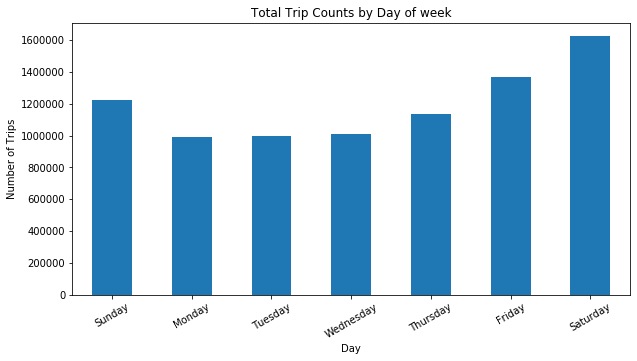

In [68]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(df['Day Of Week'].value_counts().sort_index())

# Map day of week with actual names:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_total['Day'] = days

# Plot glyph: 
daily_total.plot(kind='bar', x='Day', y='Day Of Week', title='Total Trip Counts by Day of week', figsize = (10,5), rot= 30, legend=False)
plt.ylabel("Number of Trips")
plt.savefig("Plots/trips_per_week.png")
plt.show()

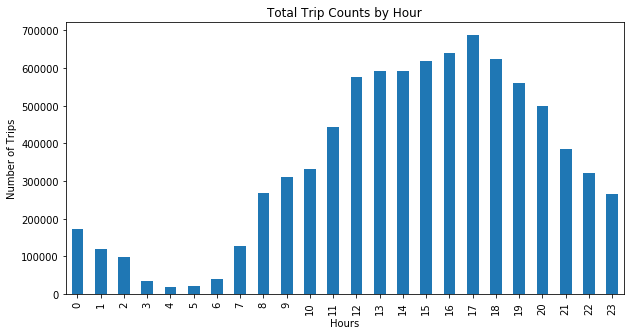

In [69]:
# Count trips per hour and sort by hour:
hourly_total = pd.DataFrame(df['Hour'].value_counts().sort_index())
#hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20','21','22','23']
#hours = ['0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9']
#hourly_total['Hours'] = hours

hourly_total.reset_index().plot(kind='bar', x='index', y='Hour', title='Total Trip Counts by Hour', figsize = (10,5), legend=False)
plt.xlabel('Hours')
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_hour.png")
plt.show()
#now shows correct plot with sorted xticks

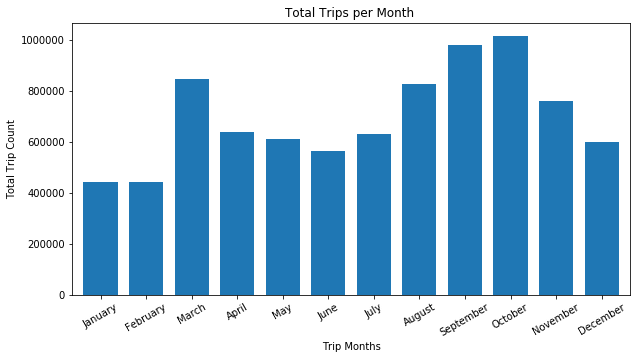

In [70]:
monthly_total = pd.DataFrame(df['Month'].value_counts()).sort_index()
import calendar
mn=[calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]

monthly_chart = monthly_total.plot.bar(title = "Total Trips per Month ",width = 0.75,figsize = (10,5),rot = 30, legend = False)
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Trip Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.savefig("Plots/trips_per_month1.png")
plt.show()
#now shows correct plot with sorted months

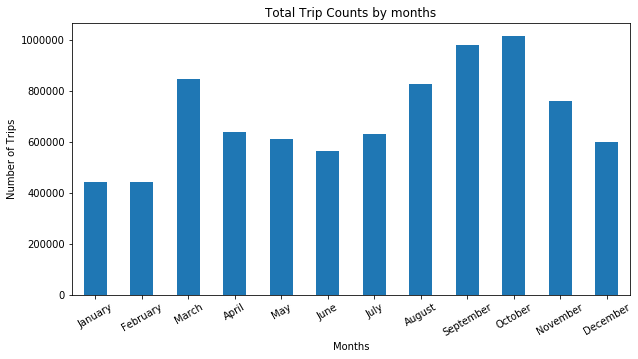

In [72]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_total['Months'] = month_list
monthly_total.reset_index().plot(kind='bar', x='Months', y='Month', title='Total Trip Counts by months', figsize = (10,5), rot = 30, legend=False)
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_month2.png")
plt.show()
#now shows correct plot with sorted xticks

In [73]:
# Count how many trips started in each census GEOID tract
census_trip_start = pd.DataFrame(df['Census GEOID Start'].value_counts().head(10))
census_trip_start

,Census GEOID Start
48453001100,3236435
48453000601,748545
48453000603,601132
48453000604,514316
48453001305,510164
48453000902,456009
48453001200,386962
48453000700,232937
48453001303,204956
48453001401,183566


In [74]:
# Count how many trips ended in each census tract
census_trip_end = pd.DataFrame(df['Census GEOID End'].value_counts())

In [ ]:
census_trip_start.reset_index().plot(kind='line', x='index', y = 'Census GEOID Start', figsize = (15,8))
plt.title("Total Count of trips starting per Census Tract")
plt.xlabel("GEOID ID")
plt.ylabel("Total Trips")
plt.savefig("Plots/trips_per_censustract.png")
plt.show()

In [75]:
df['Census GEOID Start'].value_counts()

48453001100    3236435
48453000601     748545
48453000603     601132
48453000604     514316
48453001305     510164
                ...   
48491020509          1
48491020323          1
48021950100          1
48491020603          1
48491021502          1
Name: Census GEOID Start, Length: 246, dtype: int64

In [76]:
df['Zipcode Start'].value_counts()

78701    3469372
78705    2113172
78704    1061935
78702     684933
78703     424027
78741     232157
78723      78846
78751      61674
78756      51148
78746      49549
78722      38535
78758      20382
78745      12992
78757      12812
78721      10679
78752      10084
78731       4629
78744       4031
78759       1870
78753       1724
78748        676
78727        419
78724        316
78749        253
78735        231
78660        174
78747        167
78754        139
78613        122
78617        112
78742         82
78729         75
78653         72
78726         71
78728         68
78717         66
78750         64
78664         39
78736         30
78719         27
78652         26
78681         23
78725         22
78739         11
78645          5
78669          1
78738          1
Name: Zipcode Start, dtype: int64

In [77]:
df['Zipcode End'].value_counts()

78701    3378485
78705    2083239
78704    1100282
78702     717938
78703     430475
78741     234894
78723      79036
78751      68776
78746      58333
78756      55332
78722      42282
78758      20484
78745      17580
78721      15753
78757      13789
78752      11975
78744       5648
78731       5504
78759       2012
78753       1988
78748        899
78727        503
78724        469
78735        330
78749        307
78754        210
78747        195
78660        170
78617        124
78742        119
78613        116
78728         73
78729         72
78750         69
78726         62
78717         58
78653         58
78719         45
78652         37
78664         34
78736         27
78725         25
78681         19
78739          8
78645          6
78738          2
78669          1
Name: Zipcode End, dtype: int64